In [1]:
import pandas as pd                                     #importing all necesary libraries
import numpy as np  
import matplotlib.pyplot as plt  

In [45]:
df = pd.read_excel("housing.csv.xlsx")
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [47]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 3].values

In [48]:
X

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [49]:
y

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [50]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
from sklearn.linear_model import LinearRegression             # Fitting Linear Regression to the dataset
lin_reg = LinearRegression()
lin_reg.fit(X, y)



LinearRegression()

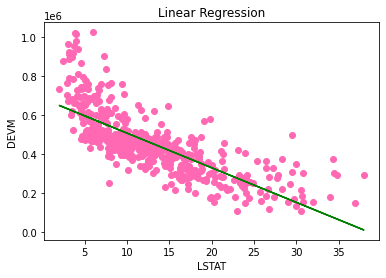

In [52]:
def viz_linear():
    plt.scatter(X, y, color='hotpink')                                # Visualizing the Linear Regression results
    plt.plot(X, lin_reg.predict(X), color='green')
    plt.title('Linear Regression')
    plt.xlabel('LSTAT')
    plt.ylabel('DEVM')
    plt.show()
    return
viz_linear()

In [53]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

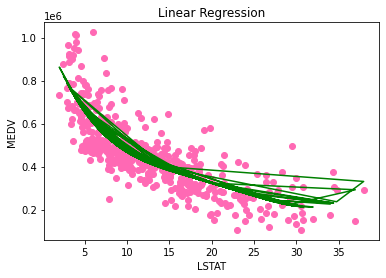

In [67]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='hotpink')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='green')
    plt.title('Linear Regression')
    plt.xlabel('LSTAT')
    plt.ylabel('MEDV')
    plt.show()
    return
viz_polymonial()

In [55]:
# Predicting a new result with Linear Regression
lin_reg.predict([[5.5]])
#output should be 249500

array([586463.72726791])

In [56]:
# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform([[5.5]]))
#output should be 132148.43750003


array([626238.76867394])

## Accuracy of the model 

In [57]:
lin_acc=lin_reg.score(X,y)
print("Accuracy of linear model:0",lin_acc)

Accuracy of linear model:0 0.5786189401388357


In [58]:
poly_acc=pol_reg.score(X_poly,y)
print("Accuracy of polynomial model:0",poly_acc)

Accuracy of polynomial model:0 0.6786453075998342


Its clearly seen that using Polynomial Regression helped us get accuracy 67%

## Comparison of Polynomial degrees 

In [59]:
poly_reg = PolynomialFeatures(degree=1)
x_poly=poly_reg.fit_transform(X)
pol_reg.fit(x_poly,y)
ypred1=pol_reg.predict(x_poly)

In [60]:
poly_reg = PolynomialFeatures(degree=2)
x_poly=poly_reg.fit_transform(X)
pol_reg.fit(x_poly,y)
ypred2=pol_reg.predict(x_poly)

In [61]:
poly_reg = PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(X)
pol_reg.fit(x_poly,y)
ypred3=pol_reg.predict(x_poly)

In [62]:
poly_reg = PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(X)
pol_reg.fit(x_poly,y)
ypred4=pol_reg.predict(x_poly)

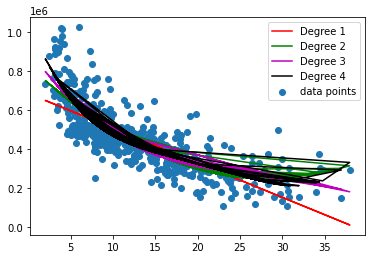

In [63]:
plt.scatter(X,y,label="data points")
plt.plot(X,ypred1, color='r',label="Degree 1")
plt.plot(X,ypred2, color='g',label="Degree 2")
plt.plot(X,ypred3, color='m',label="Degree 3")
plt.plot(X,ypred4, color='k',label="Degree 4")
plt.legend()